<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import warnings

# Numerical Quadrature

**Goal:** Accurately Evaluate definite integrals

$$ 
\int^b_a f(x) dx
$$

using a finite number of samples

### Why?

1. Many integrals do not have closed form solutions

$$ 
   \int^b_a \sqrt{1 + \cos^2 x} dx
$$

Solution to ordinary differential equations
   
   $$\frac{\text{d}^2 u}{\text{d}t^2} = f\left(u, \frac{\text{d} u}{\text{d}t}, t \right)$$
   
   Defining $v = \frac{\text{d} u}{\text{d}t}$ then leads to

   $$\begin{bmatrix}
   \frac{\text{d} v}{\text{d}t} \\ \frac{\text{d} u}{\text{d}t} \end{bmatrix} = \begin{bmatrix} f(u, v, t) \\ v \end{bmatrix}$$
   
   which can be solved by integration
   
   $$\begin{bmatrix}
   v \\ u \end{bmatrix} = \begin{bmatrix} v(t_0) + \int^t_{t_0} f(u, v, \hat{t}) d\hat{t} \\ u(t_0) + \int^t_{t_0} v d\hat{t} \end{bmatrix}$$  

Solving partial differential equations
$$
    u_t = \nabla^2 u
$$

### Basics of Quadrature

We want to approximate an integral $I$ with some approximation $I_N$ such that
$$
    I = \int^b_a f(x) dx \approx I_N = \sum^{N}_{i=1} w_i f(x_i)
$$
where the $x_i$ are the *quadrature points* or *nodes* and the $w_i$ are the *weights*.  Usually a particular quadrature rule specifies the points $x_i$ resulting in a particular set of weights $w_i$.

Convergence requires that
$$
    \lim_{N \rightarrow \infty} I_N = I.
$$

## Riemann Sums

Given $f(x)$ and a partition of the interval $[a,b]$ with $\{x_i\}^N_{i=0}$ and $a = x_0 < x_1 < \ldots < x_N = b$ and $x^*_i \in [x_i, x_{i+1}]$ we define the Riemann integral as

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

This is a general definition and leads to a number of quadrature approaches that depend on how we pick $x_i^* \in [x_i, x_{i+1}]$.

### Midpoint Rule

Choose $x_i^*$ such that

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

so that

$$I[f] = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = I_N[f]$$

over $\Delta x_i = x_{i+1} - x_i$ 

#### Example:  Integrate using midpoint rule

Calculate and illustrate the midpoint rule.  Note that we are computing the cummulative integral here:

$$
    \int^x_0 \sin(\hat{x}) d\hat{x} = \left . -\cos \hat{x} \right|^x_0 = 1 - \cos x
$$

In [ ]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 40
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]

In [ ]:
fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_star.shape)
I_hat[0] = f(x_star[0]) * delta_x
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + f(x_star[i]) * delta_x
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_star + delta_x / 2.0, I_hat, 'ko')

err = numpy.abs(I(x_star) - I_hat)

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral, Max Err = {}".format(err.max()))
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

### Newton-Cotes Quadrature

Using $N+1$ equally spaced points, evaluate $f(x)$ at these points and exactly integrate the interpolating polynomial:

$$I_N[f] = \int^b_a P_N(x) dx$$

#### Trapezoidal Rule

Use $N = 1$ polynomial to derive the trapezoidal rule.

Trapezoidal rule uses $N = 1$ order polynomials between each point (i.e. piece-wise defined linear polynomials).  Using the Linear Lagrange basis we can write the interpolating polynomial as 

$$
    P_1(x) = f(x_i)\frac{x_{i+1}-x}{\Delta x} + f(x_{i+1})\frac{x - x_i}{\Delta x}
$$

where $\Delta x = x_{i+1}-x_i$ is the width of the interval.

Integrating this polynomial we have

\begin{aligned}
    I_N[f] &= \int^{x_{i+1}}_{x_i} f(x_i)\ell_0(x) + f(x_{i+1})\ell_1(x) dx  \\
    &=\frac{1}{\Delta x}  \left. \left[ f(x_i)\left(x_{i+1}x - \frac{x^2}{2}\right) + f(x_{i+1})\left(\frac{x^2}{2}-xx_i\right) \right] \right|_{x_i}^{x_{i+1}} \\
    &= \frac{1}{\Delta x}  \left[ f(x_i)\left(\frac{x_{i+1}^2}{2} -x_ix_{i+1} + x_i^2\right) + f(x_{i+1})\left(\frac{x_{i+1}^2}{2} -x_ix_{i+1} + x_i^2\right) \right]\\
    &= \frac{(x_{i+1} - x_i)^2}{2\Delta x}\left[ f(x_i) + f(x_{i+1})\right]\\
    & = \frac{\Delta x}{2}\left[ f(x_i) + f(x_{i+1}) \right] \\
\end{aligned}

We can also simplify the sum over all the intervals by noting that all but the end points will have total contribution of $\Delta x$ to the entire sum such that

$$
    I_N[f] = \frac{\Delta x}{2} (f(x_0) + f(x_N) ) + \sum^{N-1}_{j=1} \Delta x f(x_j)
$$

This is known as the composite or extended trapezoidal rule.

In [ ]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 20
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_hat[i]), f(x_hat[i+1])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = (f(x_hat[1]) + f(x_hat[0])) * delta_x / 2.0
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x / 2.0
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

#### Simpson's Rule

Simpson's rule uses $N = 2$ order polynomials between each point (i.e. piece-wise defined quadratic polynomials).  

The polynomial has the form

$$P_2(x) = \frac{2 f(x_i)}{\Delta x^2} \left (x - \frac{\Delta x}{2} \right ) (x - \Delta x) - \frac{4 f\left(x_i + \frac{\Delta x}{2}\right)}{\Delta x^2}  x (x - \Delta x) + \frac{2 f(x_{i+1})}{\Delta x^2} x \left (x - \frac{\Delta x}{2} \right )$$

Integrating this polynomial we have

$$
    I_N[f] = \int^{x_{i+1}}_{x_i} P_2(x) dx = \frac{\Delta x}{6} f(x_i) + \frac{2 \Delta x}{3} f\left(x_i + \frac{\Delta x}{2} \right ) + \frac{\Delta x}{6} f(x_{i+1})
$$

We can also show this by using the method of undetermined coefficients.  

Use the general form of the quadrature rule and determine weights $w_j$ by using functions we know the solution to.  These functions can be any representation of polynomials up to order $N=2$ however the monomials $1$, $x$, $x^2$ are the easiest in this case.

$$
    I_{\Delta x}[f] = w_0 f(0) + w_1 f(\Delta x / 2) + w_2 f(\Delta x)
$$

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x  \\
    &\text{if}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} \\
    &\text{if}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3}
\end{aligned}$$

What are the corresponding systems of equations?

$$
    I[f] = w_0 f(0) + w_1 f(\Delta x / 2) + w_2 f(\Delta x)
$$

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x & & I_N[1] &= w_0 + w_1 + w_2 \\
    &\text{if}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} & & I_N[x] &= w_1 \frac{\Delta x}{2} + w_2\Delta x\\
    &\text{if}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3} & & I_N[x^2] &= \frac{\Delta x^2}{4} w_1 + w_2\Delta x^2\\
\end{aligned}$$

We then have the system of equations:
$$\begin{aligned}
    w_0 &+& w_1 &+& w_2 &=\Delta x \\
        &\quad& \frac{\Delta x}{2} w_1 &+& \Delta x w_2  &= \frac{\Delta x^2}{2} \\
        &\quad& \frac{\Delta x^2}{4} w_1 &+& \Delta x^2 w_2 &=\frac{\Delta x^3}{6} \\
\end{aligned}$$

or

$$
\begin{bmatrix}
    1 & 1 & 1 \\
    0 & \Delta x / 2 & \Delta x \\
    0 & \Delta x^2 / 4 & \Delta x^2 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x^2 / 2 \\ \Delta x^3 / 3
\end{bmatrix} \Rightarrow \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 1 / 4 & 1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ \Delta x / 3
\end{bmatrix}\Rightarrow 
\begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 0 & -1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ -\Delta x / 6
\end{bmatrix}
$$

Leading to 

$$ w_2 = \frac{\Delta x}{6} \quad w_1 = \frac{2}{3} \Delta x \quad w_0 = \frac{\Delta x}{6}$$

Another way to write Simpson's rule is to use intervals of three points (similar to one of the ways we did this last time).  The formulation here effectively has a $\Delta x$ half of what the intervals show but is easier to program.

In [ ]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i + 1])], 'k--')
    coeff = numpy.polyfit((x_hat[i], x_hat[i] + delta_x / 2.0, x_hat[i + 1]), 
                          (f(x_hat[i]), f(x_hat[i] + delta_x / 2.0), f(x_hat[i+1])), 2)
    x_star = numpy.linspace(x_hat[i], x_hat[i+1], 10)
    axes.plot(x_star, numpy.polyval(coeff, x_star), 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

## Error Analysis

From before we have a particular quadrature scheme $I_N$ which we can also write as

$$
    I_N[f] = \sum^{N-1}_{i=0} w_i f(x_i).
$$

Define the error $E[f]$ such that

$$I[f] = I_N[f] + E_N[f]$$

The degree of $I_N[f]$ is the integer $N$ such that $E_N[p_i] = 0 \quad \forall i \leq n$ and $\exists p_{n+1}$ such that $E[p_{n+1}] \neq 0$.

### Quadrature Accuracy

We can also use our polynomial analysis from before to analyze the errors made using both of the aforementioned methods.  From Lagrange's theorem we have the remainder term as before which we can use to look at the error

$$R_N(x) = (x - x_0)(x - x_1) \cdots (x- x_N) \frac{f^{(N+1)}(c)}{(N+1)!}$$

and integrate it to find the form and magnitude of the error on a single interval.  

To find the total error we must sum the error over all the intervals:

$$I[f] = \sum_{i=0}^N \int^{x_{i+1}}_{x_i} P_N(x) dx + \sum_{i=0}^N \int^{x_{i+1}}_{x_i} R_N(x) dx = I_N[f] + E_N[f]$$

as we defined before.

#### Trapezoidal error

With $N=1$ we have

$$R_1(x) = (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2}$$

Integrating this leads to

$$\int^{x_{i+1}}_{x_i} (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2} dx = \frac{\Delta x^3}{12} f''(c)$$

giving us a form for the error.  

If we sum up across all the intervals the total error is

$$E_N[f] = -\frac{\Delta x^3}{12} \sum_{i=0}^{N} f''(c_i)$$

or more illustrative

$$E_N[f] = -\frac{1}{2} \Delta x^2 (b - a) \left [ \frac{1}{N} \sum^{N-1}_{i=0} f''(c_i) \right ]$$

where the expression in the brackets is the mean value of the second derivative over the interval $[a,b]$.  This also shows that the trapezoidal rule converges quadratically as $\Delta x \rightarrow 0$.

#### Simpson's Rule Error

Similarly here we have $N = 2$ and 

$$R_2(x) = (x - x_i) \left(x - x_i - \frac{\Delta x}{2} \right) (x - x_{i+1}) \frac{f'''(c)}{3!}$$

Integrating and summing the error contributions we find

$$E_N[f] = -\frac{1}{180} (b - a) \Delta x^4 f^{(4)}(c)$$

Interestingly we have gained two orders of accuracy by increasing the polynomial order by only 1!

### Review:  Newton-Cotes Formulas and errors for a single interval 

given $x\in[x_i, x_{i+1}]$ and $\Delta x = x_{i+1} - x_i$, all of the   Newton-Cotes quadrature formula's can be derived by integrating the interpolating polynomial through $N$ equi-spaced points across the interval.  The error term is simply the integral of the Lagrange remainder term $R_N(x)$

* Mid-point: 1-point quadrature rule
$$
    I_M[f] = \Delta x\, f(x_i + \Delta x/2) + O(\Delta x^3f'')
$$
* Trapezoidal Rule: 2-point quadrature rule
$$
    I_T[f] = \Delta x\, \left[\frac{1}{2}f(x_i) +\frac{1}{2}f(x_{i+1})\right] + O(\Delta x^3f'')
$$
* Simpson's Rule: 3-point quadrature rule
$$
    I_S[f] = \Delta x\, \left[ \frac{1}{6}f(x_i) +  \frac{2}{3}f(x_i +\Delta x/2) +\frac{1}{6}f(x_{i+1})\right] + O(\Delta x^5f^{iv})
$$

Note: error term converges as N increases ($\Delta x$ gets smaller)

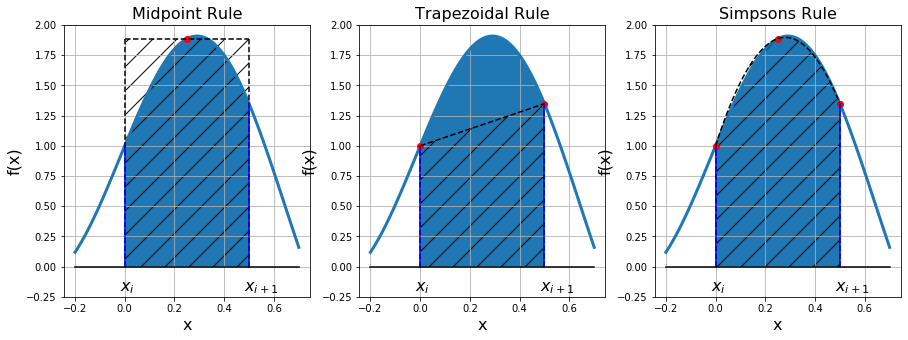

In [2]:
func = lambda x: 1 - x**2 + numpy.sin(5*x)
x0 = 0.
x1 = .5
x_buf = .2
x = numpy.linspace(x0 - x_buf, x1+ x_buf, 100)
x_interval = numpy.linspace(x0, x1, 100)

x_samp = numpy.array([ 0.5*(x0 + x1) ])
f_samp = func(x_samp)

fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(1,3,1)
axes.plot(x,func(x),linewidth=3)
axes.plot(x_samp, f_samp, 'ro')
axes.plot(x_interval, f_samp*numpy.ones(x_interval.shape), 'k--')
axes.plot(x0*numpy.ones(2), [0., f_samp],'k--')
axes.plot(x1*numpy.ones(2), [0., f_samp],'k--')
axes.plot(x0*numpy.ones(2), [0., func(x0)],'b')
axes.plot(x1*numpy.ones(2), [0., func(x1)],'b')
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$x_i$',fontsize=16)
axes.text(x1-.02,-.2,'$x_{i+1}$',fontsize=16)
axes.set_title('Midpoint Rule',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_ylim((-0.25, 2.))
axes.fill_between(x_interval,0.,func(x_interval))
axes.fill_between(x_interval, 0, f_samp*numpy.ones(x_interval.shape), hatch='/', alpha=0)
axes.grid()

axes = fig.add_subplot(1,3,2)
x_samp = numpy.array([x0, x1])
f_samp = func(x_samp)
axes.plot(x,func(x),linewidth=3)
axes.plot(x_samp, f_samp, 'ro')
axes.plot(x_samp, f_samp, 'k--')
axes.plot(x0*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x1*numpy.ones(2), [0., f_samp[1]],'k--')
axes.plot(x0*numpy.ones(2), [0., func(x0)],'b')
axes.plot(x1*numpy.ones(2), [0., func(x1)],'b')
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$x_i$',fontsize=16)
axes.text(x1-.02,-.2,'$x_{i+1}$',fontsize=16)
axes.set_title('Trapezoidal Rule',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_ylim((-0.25, 2.))
axes.fill_between(x_interval,0.,func(x_interval))
axes.fill_between(x_samp,0.,f_samp, hatch='/', alpha=0)


axes.grid()

axes = fig.add_subplot(1,3,3)
x_samp = numpy.array([x0, (x0 + x1)/2., x1])
f_samp = func(x_samp)
p = numpy.polyfit(x_samp, f_samp, 2)
f_p2 = numpy.polyval(p, x_interval)
axes.plot(x,func(x),linewidth=3)
axes.plot(x_samp, f_samp, 'ro')
axes.plot(x_interval, f_p2, 'k--')
axes.plot(x0*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x1*numpy.ones(2), [0., f_samp[-1]],'k--')
axes.plot(x0*numpy.ones(2), [0., func(x0)],'b')
axes.plot(x1*numpy.ones(2), [0., func(x1)],'b')
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$x_i$',fontsize=16)
axes.text(x1-.02,-.2,'$x_{i+1}$',fontsize=16)
axes.set_title('Simpsons Rule',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_ylim((-0.25, 2.))
axes.fill_between(x_interval,0.,func(x_interval))
axes.fill_between(x_interval,0.,f_p2, hatch='/', alpha=0)


axes.grid()
plt.show()

##### Example 1:

If $f(x) = \sin \pi x$ look at the relative accuracy of midpoint, trapezoidal and simpson's rules for a single interval $x\in[0,1]$.

$$\begin{aligned}
    \text{Exact:}  &I[f] = \int^1_0 \sin \pi x = \left . \frac{-\cos \pi x}{\pi} \right |^1_0 = \frac{2}{\pi} \approx 0.636619772 \\
    \text{Midpoint:}  &I_M[f] = \Delta x f(1/2) = \sin (\pi / 2) = 1 \\
    \text{Trapezoid:}  &I_T[f] = \frac{\Delta x}{2} (\sin(0) + \sin(\pi)) = 0 \\
    \text{Simpson's:}  &I_S[f] = \frac{\Delta x}{6} \sin(0) + \frac{2 \Delta x}{3} \sin(\pi / 2) + \frac{\Delta x}{6} \sin(\pi) = \frac{2 \Delta x}{3} = \frac{2}{3}
\end{aligned}$$

### Cumulative (global) Error for extended Newton-Cotes formulas

For $N$ panels of any given N-C quadrature formula over the interval $x\in[a,b]$, the approximate integral and error formulas are

\begin{align}
I[f] &= \sum_{i=0}^N I_i + E_N\\
\end{align}
where 
$$
    E_N = (b-a)O(\Delta x^p f^{m}(c))
$$

* Extended Mid-point: 
$$
    E_{N_M} = (b-a) O(\Delta x^2 f''')
$$
* Extended Trapezoidal Rule: 
$$
    E_{N_M} = (b-a) O(\Delta x^2 f''')
$$
* Extended Simpson: 
$$
    E_{N_M} = (b-a) O(\Delta x^4 f^{(v)})
$$

Where $\Delta x = \frac{b -a }{N}$

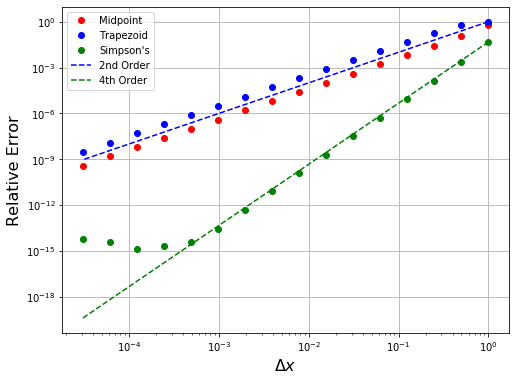

In [3]:
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)

num_partitions = numpy.array([ 2**n for n in range(0, 16)])
delta_x = numpy.empty(len(num_partitions))
error_mid = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))

I_true = 2.0/numpy.pi

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]

    # Compute Midpoint
    x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
    I_hat = 0.0
    for i in range(0, N):
        I_hat += f(x_star[i]) * delta_x[j]
    error_mid[j] = numpy.abs(I_hat - I_true)/I_true
    
    # Compute trapezoid
    I_hat = 0.0
    for i in range(1, N):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - I_true)/I_true
    
    # Compute simpson's    
    I_hat = 0.0
    for i in range(0, N):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - I_true)/I_true

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, error_mid, 'ro', label="Midpoint")
axes.loglog(delta_x, error_trap, 'bo', label="Trapezoid")
axes.loglog(delta_x, error_simpson, 'go', label="Simpson's")
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], 4.0) * delta_x**4.0, 'g--', label="4th Order")
axes.legend(loc='best')
axes.set_xlabel('$\Delta x$', fontsize=16)
axes.set_ylabel('Relative Error', fontsize=16)
axes.grid()

plt.show()

### Recursive Improvement of Accuracy

Say we ran the trapezoidal rule with step size $2 \Delta x$, we then will have

$$\begin{aligned}
			\int^{x_2}_{x_0} f(x) dx  &= \frac{2 \Delta x}{2} (f_0 + f_2) =  h (f_0 + f_2) \Rightarrow \\
			\int^b_a f(x)dx &\approx I_{2\Delta x}[f] = \sum^{N/2-1}_{j=0} \Delta x (f_{2j} + f_{2j+2}) \\
			&= \Delta x (f_{0} + f_{2})  + \Delta x (f_{2} + f_{4})  + \cdots + \Delta x (f_{N-2} + f_{N}) \\
			&= \Delta x\left ( f_0 + f_N +  2 \sum^{N/2-1}_{j=1} f_{2j} \right )
  \end{aligned}
$$

Now compare the two rules for $\Delta x$ and $2 \Delta x$:

$$\begin{align}I_{\Delta x}[f] &= \frac{\Delta x}{2} \left (f_0 + f_N + 2 \sum^{N-1}_{j=1} f_j \right)\\ I_{2 \Delta x}[f] &= \Delta x \left ( f_0 + f_N +  2 \sum^{N/2-1}_{j=1} f_{2j} \right )\end{align}$$

$$I_{\Delta x}[f] = \frac{1}{2} I_{2\Delta x} + \Delta x(f_1 + f_3 + \cdots + f_{N-1})$$

Here we see we can actually reuse the work we did to calculate $Q_{2 \Delta x}[f]$ to refine the integral.

### Arbitrary Intervals (Affine Transforms)

A lot of quadrature rules are defined on specific intervals, e.g $x\in[0,1]$ or $x\in[-1,1]$.  However any two intervals can always be mapped onto each other through an  *affine transform* or *affine map* which is a __linear  transformation__.

$$
    x = \alpha\xi + \beta
$$
where $\alpha$ is a scaling and $\beta$ is a shift.  

Given $\alpha$ and $\beta$,  the inverse map is simply

$$
    \xi = \frac{x - \beta}{\alpha}
$$

### Example:  

Map $ x \in [a,b]\rightarrow\xi \in [-1,1]$

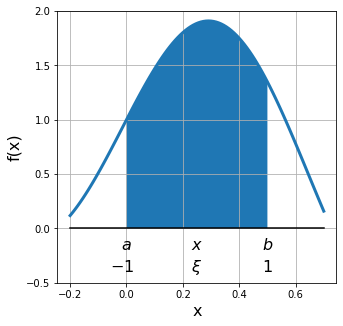

In [4]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_subplot(1,1,1)
axes.plot(x,func(x),linewidth=3)
axes.fill_between(x_interval,0.,func(x_interval))
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$a$',fontsize=16)
axes.text((x0+x1)/2.-.02,-.2,'$x$',fontsize=16)
axes.text(x1-.02,-.2,'$b$',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.text(x0-.06,-.4,'$-1$',fontsize=16)
axes.text((x0+x1)/2.-.02,-.4,'$\\xi$',fontsize=16)
axes.text(x1-.02,-.4,'$1$',fontsize=16)
axes.set_ylim((-0.5, 2.))
axes.grid()


$$x =  \frac{b - a}{2}\xi + \frac{a+b}{2}$$

$$\xi = \left( x - \frac{a + b}{2}\right) \frac{2}{b-a}$$

Given an Affine mapping,  it is easy to transform any integral from one coordinate system to another

$$
    I[f] = \int^b_a f(x) dx = \int^1_{-1} f(x(\xi)) \frac{dx}{d\xi} d\xi = \frac{b - a}{2} \int^1_{-1} f(x(\xi)) d\xi\\
$$

and the $N$ point quadrature rule for a single interval is
$$
    I_N[f]_i = \frac{\Delta x_i}{2} \sum_{n=1}^{N} w_n f(x(\xi_n))
$$

and the cumulative integral over $M$ panels
$$
    I_N[f] = \sum_{i=1}^M I_N[f]_i
$$

#### Example:  Newton-Cotes Rules

We can rewrite our previous quadrature rules so that they are given on the interval $\xi \in [-1, 1]$ instead of $x \in [x_i, x_{i+1}]$.  Recall that a general quadrature rule can be written as
$$
    \sum^N_{i=1} w_i f(\xi_i)
$$
where $w_i$ are the weights and $\xi_i$ are the points specified to evaluate the function at. 

 For Newton-Cotes rules we know that the points $\xi_i$ are uniformly distributed on $[-1, 1]$ but we still need to define the weights.  For a 2-Point trapezoid rule we can do this to find that
$$
    \int^1_{-1} f(x) dx \approx f(-1) + f(1)
$$
so the quadrature points are at  $\xi_0 = [-1, 1]$ with weights $w = [1, 1]$  

Note that if we map this using our affine transform we would get back the original trapezoid rule:
$$
    I_2[f] = \frac{dx}{d\xi}\sum_{n=1}^{2} w_n f(x(\xi_n))  = \frac{\Delta x}{2}(f(a) + f(b)) 
$$

Note: $dx = \Delta x$, and $d\xi = 2$ (\[-1, 1\])

Similarly for Simpson's rule we have
$$
    \xi = [-1, 0, 1] \quad \text{and} \quad w = \left[\frac{1}{3}, \frac{4}{3}, \frac{1}{3} \right].
$$

In [5]:
def ncintegration(f, a, b, N):
    """ Approximate \int_a^b f(x)dx using  Newton-Cotes quadrature rules with N<=3 quadrature points"""
        
    assert (N > 0)
    assert (N < 4)
    # Build up a nested list of integration points and weights for the interval [-1, 1]:
    xNC = []
    wNC = []
    # 1 point Newton-Cotes (Mid-point) 
    xNC.append(numpy.array([0.]))
    wNC.append(numpy.array([2.]))
    # 2 point Newton-Cotes quadrature (Trapezoidal)
    xNC.append(numpy.array([ -1., 1. ]))
    wNC.append(numpy.array([ 1. , 1.]))
    # 3 point Newton-Cotes quadrature (Simpson's rule)
    xNC.append(numpy.array([-1., 0., 1.]))
    wNC.append(numpy.array([1., 4., 1.])/3.)
    
    # make affine map between x and xi
    xi_map = lambda xi: (b - a)/2. * xi + (a + b) / 2.
    
    # Calculate I[f] for each NC method
    I = (b - a)/2. * numpy.sum(wNC[N-1]*f(xi_map(xNC[N-1])))
    return I



In [6]:
# Note that this calculates the cumulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: - numpy.cos(x)

a = numpy.pi/4.
b = 3*numpy.pi/4.
b = numpy.pi/2
I_true = I(b) - I(a)
print(I_true)

0.7071067811865475


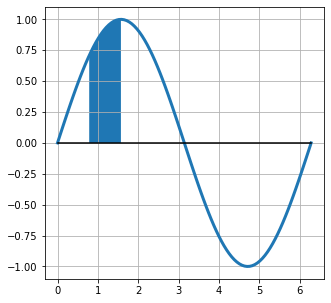

In [7]:
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)
x_interval = numpy.linspace(a, b, 100)
fig = plt.figure(figsize=(5,5))
axes = fig.add_subplot(1,1,1)
axes.plot(x,f(x),linewidth=3)
axes.fill_between(x_interval,0.,f(x_interval))
axes.plot(x, numpy.zeros(x.shape),'k')

axes.grid()

In [8]:
# Calculate Newton-Cotes Quadrature and relative errors for 1,2, and 3 point NC quadrature schemes
for N in range(1,4):
    I = ncintegration(f,a,b,N)
    err = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I_N = {}, err = {}'.format(N, I, err))
    

N = 1, I_N = 0.7256132880348577, err = 0.026172152977030898
N = 2, I_N = 0.670379265333622, err = 0.051940551031480015
N = 3, I_N = 0.7072019471344457, err = 0.00013458497419382203


## Optimal Quadrature Methods

Newton-Cotes formulas assume a fixed, regularly spaced set of quadrature points and calculate quadrature rules based on integrating the interpolating polynomial.  

Can we do better?

Actually, if we allow both the points and weights to be chosen in an optimal way, we can generate optimal quadrature rules with $N$ points that can exactly integrate polynomials up to order $2N-1$

### Generalized Gaussian Quadrature

Given $g(x) \in P_N(x)$ with roots $\{x_i\}^N_{i=1}$ with the property
$$
    \int^1_{-1} w(x) x^i g(x) dx = 0 \quad \forall i < N,
$$

implies that  $g(x)$ is __*orthogonal* to all monomials__ $x^i$ ($i <N$) with respect to the weight function $w(x)$.

Note: see Wikipedia page on Gaussian Quadrature

Recall something similar:
$$
    <x, y> = \sum^N_{i=1} x_i y_i = ||x|| \cdot ||y|| \cos \theta.
$$
If $<x, y> = 0$ then the vectors $x$ and $y$ are orthogonal.

Given the above $g(x)$ there then exists a set of weights $\{w_i\}$ such that

$$\int^1_{-1} w(x) P_j(x) dx = \sum^N_{i=1} w_i P_j(x_i) \quad \forall j \leq 2 N - 1$$

In other words, given a polynomial basis function and weight and orthogonality to all polynomials of order $i < N$ we can exactly integrate polynomials of order $2 N - 1$.  For a proof and considerably more detail see https://en.wikipedia.org/wiki/Gaussian_quadrature

Choosing the correct weighting function and basis leads to a number of useful quadrature approaches:

#### Gauss-Legendre Quadrature

General Gauss-Legendre quadrature uses $w(x) = 1$ and $g(x) = \ell_N(x)$ which are the Legendre Polynomials, which can be shown to have weights

$$w_i = \frac{2}{(1-x_i^2)(\ell'_n(x_i))^2}$$

and $x_i$ is the $i$th root of $\ell_N$.  

Note: $\ell_N(x)$ here denotes Legendre polynomial, not Lagrange

The first few Legendre Polynomials are 
\begin{align}
    \ell_1(x) &=x \\
    \ell_2(x) &= \frac{1}{2}(3x^2 -1)\\
    \ell_3(x) &= \frac{1}{2}x(5x^2 - 3)\\
       \vdots
\end{align}

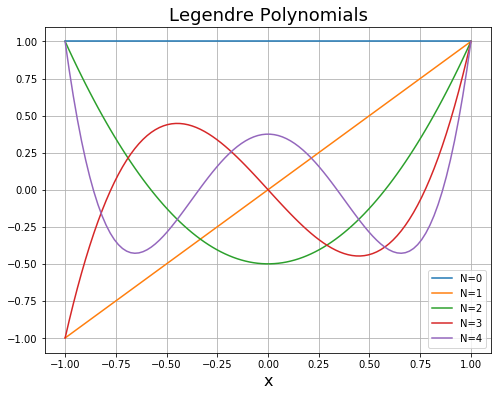

In [9]:
from scipy.special import legendre
x = numpy.linspace(-1,1,100)

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
for N in range(5):
    Pn = legendre(N)
    axes.plot(x, Pn(x), label='N={}'.format(N))

axes.grid()
axes.set_title('Legendre Polynomials', fontsize=18)
axes.set_xlabel('x',fontsize=16)
axes.legend(loc='best')
plt.show()


Which lead to the quadrature points and weights...

<table width="80%">
    <tr align="center"><th>$$N$$</th> <th align="center">$$x_i$$</th> <th align="center"> $$w_i$$ </th></tr>
    <tr align="center"><td>$$1$$</td>           <td> $$0$$ </td> <td> $$2$$ </td> </tr>
    <tr align="center"><td>$$2$$</td>           <td> $$\pm \sqrt{\frac{1}{3}}$$ </td> <td> $$1$$ </td> </tr>
    <tr align="center"><td rowspan=2>$$3$$</td> <td> $$0$$ </td> <td> $$8/9$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \sqrt{\frac{3}{5}}$$ </td> <td> $$5/9$$</td> </tr>
    <tr align="center"><td rowspan=2>$$4$$</td> <td> $$\pm \sqrt{\frac{3}{7} - \frac{2}{7} \sqrt{\frac{6}{5}}}$$</td> <td> $$\frac{18 + \sqrt{30}}{36}$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \sqrt{\frac{3}{7} + \frac{2}{7} \sqrt{\frac{6}{5}}}$$</td> <td>$$\frac{18 - \sqrt{30}}{36}$$ </td> </tr>
    <tr align="center"><td rowspan=3>$$5$$</td> <td> $$0$$ </td> <td> $$\frac{128}{225}$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \frac{1}{3} \sqrt{5 - 2 \sqrt{\frac{10}{7}}}$$</td> <td> $$\frac{322 + 13\sqrt{70}}{900}$$</td> </tr>
    <tr align="center">                     <td> $$\pm \frac{1}{3} \sqrt{5 + 2 \sqrt{\frac{10}{7}}}$$</td> <td> $$\frac{322 - 13\sqrt{70}}{900}$$</td> </tr>
</table>

Note: weights always add up to 2 for \[-1,1\] for each N.

##### Example 2:  2-Point Gauss-Legendre Quadrature

Let $N=2$ on $x \in [-1,1]$

$$I_2[f] = w_0 f(x_0) + w_1 f(x_1)$$

From above table we are told that $x_0 = -\sqrt{\frac{1}{3}}$, $x_1 = \sqrt{\frac{1}{3}}$ and $w_0 = w_1 = 1$

We can actually solve for the 2 weights and 2 locations using the method of *undetermined coefficients*

I.e.  Assume 
$$
    I_2[f] = w_0 f(x_0) + w_1 f(x_1)
$$

and solve for $w_0, w_1, x_0, x_1$ that exactly integrate the first 4 monomials, $1, x, x^2, x^3$.

    
$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{1}_{-1} 1 dx = 2 & & I_2[1] &= w_0 + w_1\\
    &\text{if}~f = x:  &I[f] =  \int^{1}_{-1} x dx = 0 & & I_2[x] &= w_0 x_0 + w_1 x_1\\
    &\text{if}~f = x^2:  &I[f] =  \int^{1}_{-1} x^2 dx = \frac{2}{3} & & I_2[x^2] &= w_0 x_0^2 + w_1 x_1^2\\
    &\text{if}~f = x^3:  &I[f] =  \int^{1}_{-1} x^3 dx = 0 & & I_2[x^3] &= w_0 x_0^3 + w_1 x_1^3\\
\end{aligned}$$

$$\begin{aligned}
    &w_0 + w_1 = 2\\
    &w_0 x_0 + w_1 x_1 = 0\\
    &w_0 x_0^2 + w_1 x_1^2 = \frac{2}{3}\\
    &w_0 x_0^3 + w_1 x_1^3 = 0\\
\end{aligned}$$

Note that we need to solve for 4 unknowns $x_0$, $x_1$, $w_0$, and $w_1$.  Solving these non-linear equations leads to

$$x_0 = -\sqrt{\frac{1}{3}}, x_1 = \sqrt{\frac{1}{3}}  \quad \text{and} \quad w_0 = w_1 = 1 $$

Note: Integration is linear transformation

Note: Quadrature points for GL are never at endpoints of interval

##### Example: Gauss-Legendre Quadrature single interval

let $f(x) = \cos(x)$:

$$
    I[f] = \int_0^{\pi/2} f(x) dx = \left.\sin(x)\right|_0^{\pi/2} = 1.
$$

so the affine map from $x\in[0,\pi/2]\rightarrow\xi\in[-1,1]$ is

\begin{align}
x &= \frac{\pi}{4}\xi + \frac{\pi}{4} \\
&= \frac{\pi}{4}\left(\xi + 1\right)
\end{align}

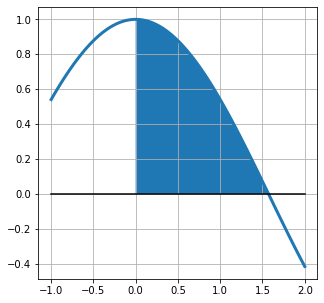

In [10]:
f = lambda x: numpy.cos(x)
I = 1.

x = numpy.linspace(-1.,2, 100)
x_interval = numpy.linspace(0., numpy.pi/2, 100)
fig = plt.figure(figsize=(5,5))
axes = fig.add_subplot(1,1,1)
axes.plot(x,f(x),linewidth=3)
axes.fill_between(x_interval,0.,f(x_interval))
axes.plot(x, numpy.zeros(x.shape),'k')

axes.grid()

In [11]:
def glintegration(f, a, b, N):
    """ Approximate \int_a^b f(x)dx using  Gauss-Legendre quadrature rules with N<=4 quadrature points"""
        
    # Build up a nested list of gauss points and weights:
    xGl = []
    wGl = []
    # 1 point Gauss-legendre quadrature
    xGl.append(numpy.array([0.]))
    wGl.append(numpy.array([2.]))
    # 2 point Gauss-legendre quadrature
    xGl.append(numpy.array([ -1./numpy.sqrt(3.), 1./numpy.sqrt(3)]))
    wGl.append(numpy.array([ 1. , 1.]))
    # 3 point Gauss-legendre quadrature
    xGl.append(numpy.array([-numpy.sqrt(3. /5.), 0., numpy.sqrt(3. / 5.)]))
    wGl.append(numpy.array([5., 8., 5.])/9.)
    # 4 point Gauss-Legendre quadrature
    xGl.append(numpy.array([-numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)), 
           numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
          -numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
           numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0))]))                 
    wGl.append(numpy.array([(18.0 + numpy.sqrt(30.0)) / 36.0, (18.0 + numpy.sqrt(30.0)) / 36.0,
         (18.0 - numpy.sqrt(30.0)) / 36.0, (18.0 - numpy.sqrt(30.0)) / 36.0]))
    
    # make affine map between x and xi
    xi_map = lambda xi: (b - a)/2. * xi + (a + b) / 2.
    
    I = (b - a)/2. * numpy.sum(wGl[N-1]*f(xi_map(xGl[N-1])))
    return I



In [12]:
a = 0.
b = numpy.pi/2
I_true = 1.
err = numpy.zeros(4)
for N in range(1,5):
    I = glintegration(f, a, b, N)
    err[N-1] = numpy.abs(I_true - I)
    print('N = {}, I = {}, err = {}'.format(N,I, err[N-1]))

N = 1, I = 1.1107207345395915, err = 0.11072073453959153
N = 2, I = 0.9984726134041148, err = 0.0015273865958852495
N = 3, I = 1.0000081215554983, err = 8.121555498341593e-06
N = 4, I = 0.9999999771971155, err = 2.2802884469541596e-08


N = 1, I = 1.1107207345395915, err = 0.11072073453959153
N = 2, I = 0.7853981633974483, err = 0.21460183660255172
N = 3, I = 1.0022798774922104, err = 0.0022798774922103693


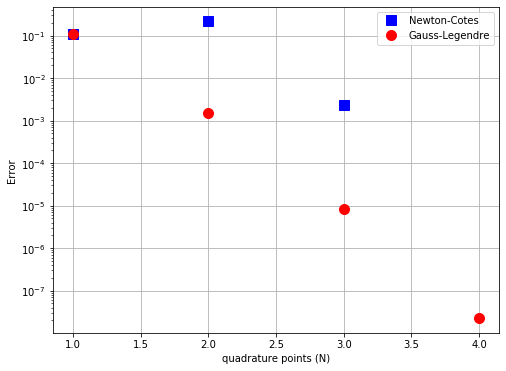

In [15]:
errNC = numpy.zeros(4)
for N in range(1,4):
    I = ncintegration(f, a, b, N)
    errNC[N-1] = numpy.abs(I_true - I)
    print('N = {}, I = {}, err = {}'.format(N,I, errNC[N-1]))
    
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(range(1,5),errNC,'bs', markersize=10, label='Newton-Cotes')
axes.semilogy(range(1,5),err,'ro', markersize=10, label='Gauss-Legendre')
axes.set_ylabel('Error')
axes.set_xlabel('quadrature points (N)')
axes.legend(loc='best')
axes.grid()
plt.show()

In [21]:
# Cubic f(x): Exact interpolation at/after 2N-1 (N=2)
f = lambda x: - 4*x**3 - 3.*x**2 + 2.*x +300.
int_f = lambda x:  - x**4 - x**3. + x**2 + x*300.

# 4th order f(x): N=3
f = lambda x: x**5 - 4*x**3 - 3.*x**2 + 2.*x +300.
int_f = lambda x: x**6/6. - x**4 - x**3. + x**2 + x*300.

a = 1.
b = 4.
I_true = int_f(b) - int_f(a)
print('I_true = {}'.format(I_true))
for N in range(1,5):
    I = glintegration(f, a, b, N)
    print('N = {}, I = {}'.format(N,I))

I_true = 1279.4999999999998
N = 1, I = 964.21875
N = 2, I = 1262.625
N = 3, I = 1279.5
N = 4, I = 1279.5000000000002


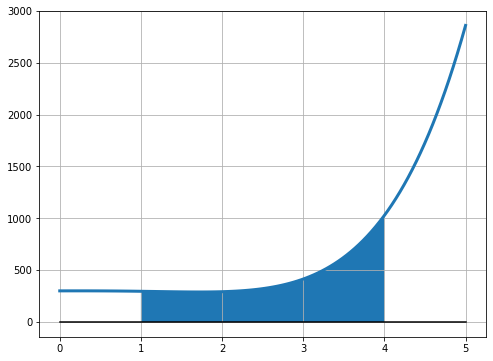

In [22]:
x = numpy.linspace(a - 1, b + 1, 100)
x_interval = numpy.linspace(a, b, 100)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(x,f(x),linewidth=3)
axes.fill_between(x_interval,0.,f(x_interval))
axes.plot(x, numpy.zeros(x.shape),'k')

axes.grid()
plt.show()

In [24]:
# Compute Gauss-Legendre based quadrature and affine transforms
f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
xi_0 = -numpy.sqrt(1.0 / 3.0)
xi_1 =  numpy.sqrt(1.0 / 3.0)
I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = (f(xi_map(x_hat[0], x_hat[1], xi_0)) + f(xi_map(x_hat[0], x_hat[1], xi_1))) * delta_x / 2.0
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + (f(xi_map(x_hat[i], x_hat[i+1], xi_0)) + f(xi_map(x_hat[i], x_hat[i+1], xi_1))) * delta_x / 2.0
    
error = numpy.abs(I_hat - I(x_hat + delta_x))
error[:-1]

array([6.97744637e-06, 2.52446381e-05, 4.78241289e-05, 6.60913206e-05,
       7.30687670e-05, 6.60913206e-05, 4.78241289e-05, 2.52446381e-05,
       6.97744637e-06, 1.66533454e-16])

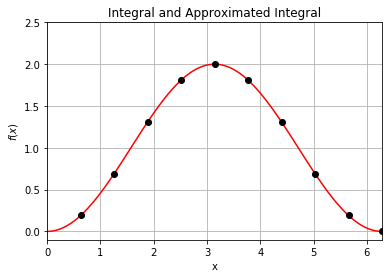

In [25]:
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))
axes.grid()
plt.show()

##### Example 3:

If $f(x) = e^x$ look at the relative accuracy of midpoint, trapezoidal, Simpson's and 2-point Gauss-Legendre quadrature for a single interval $x \in [-1,1]$.

$$\begin{aligned}
    \text{Exact:} &I[f] = \int^1_{-1} e^x = \left . e^x \right |^1_{-1} = e - \frac{1}{e} \approx 2.350402387 \\
    \text{Midpoint:} &I_2[f] = 2 e^0 = 2 \\
    \text{Trapezoid:} &I_2[f] = \frac{2}{2} (e^{-1} + e^1) = e + \frac{1}{e} = 3.08616127 \\
    \text{Simpson's:} &I_2[f] = \frac{2}{6} e^{-1} + \frac{4}{3} e^0 + \frac{2}{6} e^1 = \frac{4}{3} + \frac{1}{3} (e^{-1} + e^1) \approx 2.362053757 \\
    \text{Gauss-Legendre:} &I_2[f] = e^{-\sqrt{\frac{1}{3}}} + e^{\sqrt{\frac{1}{3}}} \approx 2.342696088
\end{aligned}$$

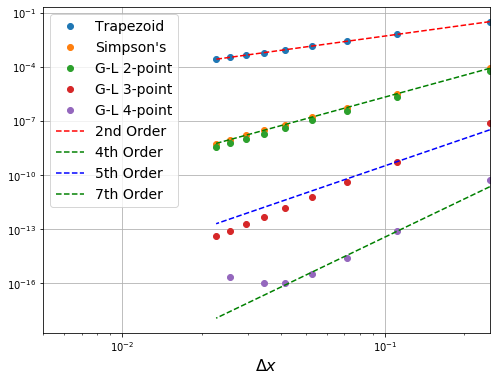

In [26]:
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)
I = 2.0 / numpy.pi

# num_partitions = range(50, 1000, 50)
num_partitions = range(5, 50, 5)
delta_x = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))
error_2 = numpy.empty(len(num_partitions))
error_3 = numpy.empty(len(num_partitions))
error_4 = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    # Compute trapezoid
    I_hat = 0.0
    for i in range(0, N - 1):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - I)
    
    # Compute simpson's    
    I_hat = 0.0
    for i in range(0, N - 1):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - I)
    
    # Compute Gauss-Legendre 2-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(1.0 / 3.0), numpy.sqrt(1.0 / 3.0)]
    w = [1.0, 1.0]
    I_hat = 0.0
    for i in range(0, N - 1):
        for k in range(len(xi)):
            I_hat += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    I_hat *= delta_x[j] / 2.0
    error_2[j] = numpy.abs(I_hat - I)
    
    # Compute Gauss-Legendre 3-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 5.0), 0.0, numpy.sqrt(3.0 / 5.0)]
    w = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
    I_hat = 0.0
    for i in range(0, N - 1):
        for k in range(len(xi)):
            I_hat += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    I_hat *= delta_x[j] / 2.0
    error_3[j] = numpy.abs(I_hat - I)
    
    # Compute Gauss-Legendre 4-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)), 
           numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
          -numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
           numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0))]
    w = [(18.0 + numpy.sqrt(30.0)) / 36.0, (18.0 + numpy.sqrt(30.0)) / 36.0,
         (18.0 - numpy.sqrt(30.0)) / 36.0, (18.0 - numpy.sqrt(30.0)) / 36.0]
    I_hat = 0.0
    for i in range(0, N - 1):
        for k in range(len(xi)):
            I_hat += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    I_hat *= delta_x[j] / 2.0
    error_4[j] = numpy.abs(I_hat - I)
    
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error_trap, 'o', label="Trapezoid")
axes.loglog(delta_x, error_simpson, 'o', label="Simpson's")
axes.loglog(delta_x, error_2, 'o', label="G-L 2-point")
axes.loglog(delta_x, error_3, 'o', label="G-L 3-point")
axes.loglog(delta_x, error_4, 'o', label="G-L 4-point")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], 4.0) * delta_x**4.0, 'g--', label="4th Order")
axes.loglog(delta_x, order_C(delta_x[1], error_3[1], 5) * delta_x**5, 'b--', label="5th Order")
axes.loglog(delta_x, order_C(delta_x[1], error_4[1], 7.0) * delta_x**7.0, 'g--', label="7th Order")

axes.legend(loc='best',fontsize=14)
axes.set_xlabel('$\Delta x$', fontsize=16)
axes.set_xlim((5e-3, delta_x[0]))
axes.grid()

plt.show()

#### Other Quadrature Families

 - Clenshaw-Curtis (Gauss-Chebyshev): If $w(x) = \frac{1}{\sqrt{1 - x^2}}$ and $g(x)$ are Chebyshev polynomials then we know the roots of the polynomials to be $x_i = \cos\left(\frac{2i-1}{2N} \pi \right)$ (the Chebyshev nodes) and we can derive that $w_i = \frac{\pi}{N}$.
 - Gauss-Hermite:  If $w(x) = e^{-x^2}$ and $g(x)$ are Hermite polynomials $H_i(x)$ then
   $$w_i = \frac{2^{N-1} N! \sqrt{\pi}}{N^2 (H_{N-1}(x_i))^2}$$

## SciPy Integration Routines

SciPy has a number of integration routines that we have derived here including general purpose integrators that can control error.

In [ ]:
import scipy.integrate as integrate
# integrate?